In [258]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

Tu so zbrani vsi podatki.

In [259]:
podatki = pd.read_csv('zbrani_podatki.csv', dtype={"LETO": "Int32"}, index_col="ID")
pd.options.display.max_rows = 50
podatki

,LETO,AVTOR,MESTO,DRŽAVA,TABLATURA,INSTRUMENT,STRUNE,RAZPRAVA
ID,,,,,,,,
0,0,NaN,NaN,NaN,German tablature,lute,5,NE
1,1460,NaN,Brunswick,Germany,NaN,lute,5,NE
2,0,NaN,Königstein,Germany,German tablature,lute,5,NE
3,0,NaN,Fritzlar,Germany,keyboard tablature,lute,5,NE
4,0,NaN,NaN,NaN,"Italian tablature, French tablature, Neapolita...","guitar, lute",6,NE
...,...,...,...,...,...,...,...,...
9399,0,NaN,Leipzig and Mainz,Germany,NaN,guitar,NaN,NE
9400,0,NaN,Hamburg and Altona,Germany,NaN,guitar,NaN,NE
9401,0,NaN,Vienna,Austria,NaN,guitar,NaN,NE


Text(0.5, 1.0, 'Število izdanih del za lutnjo po državah')

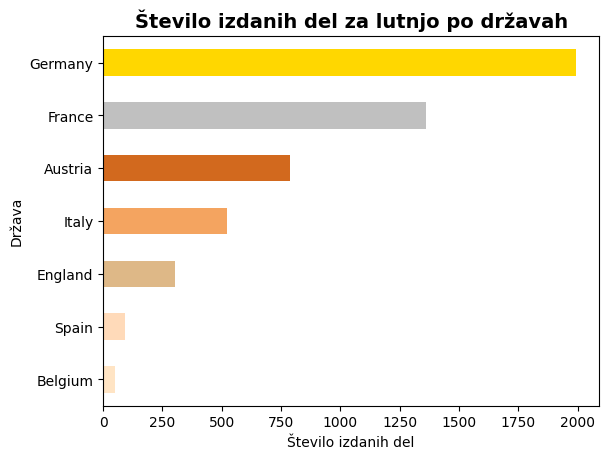

In [270]:
podatki_države = podatki[podatki.DRŽAVA != "nan"].groupby("DRŽAVA")
podatki_države.size().sort_values().tail(7).plot.barh(
    ylabel="Država", xlabel="Število izdanih del", 
    color=["bisque", "peachpuff", "burlywood", "sandybrown", "chocolate", "silver", "gold"])
plt.title("Število izdanih del za lutnjo po državah", fontsize=14, weight="bold")

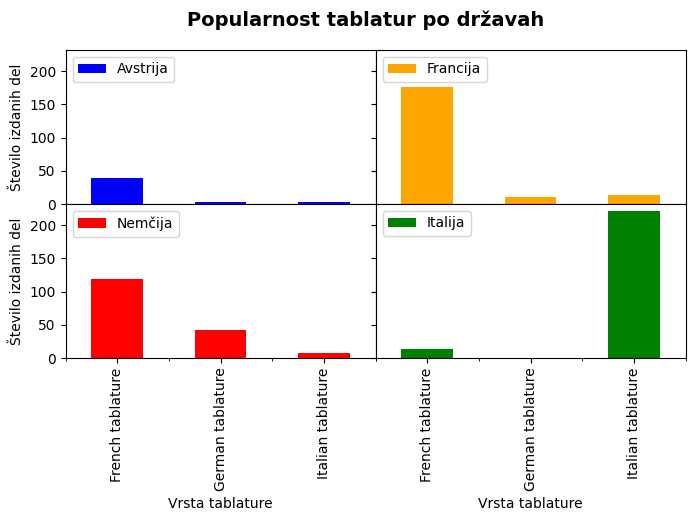

In [261]:
fig = plt.figure(figsize = (8, 4),)
gs = fig.add_gridspec(2, 2, hspace=0, wspace=0)
axes= gs.subplots(sharex= True, sharey= True)

for ax in axes.flat:
    ax.set(ylabel= "Število izdanih del")

avstrija_tablatura = podatki[(podatki.DRŽAVA == "Austria") & (podatki.TABLATURA.isin([
    "French tablature", "Italian tablature", "German tablature"]))
    ].groupby("TABLATURA").size().plot.bar(ax=axes[0, 0], color= "blue", label = "Avstrija", legend = True)
nemčija_tablatura = podatki[(podatki.DRŽAVA == "Germany") & (podatki.TABLATURA.isin([
    "French tablature", "Italian tablature", "German tablature"]))
    ].groupby("TABLATURA").size().plot.bar(ax=axes[1, 0], color="red", label = "Nemčija", legend = True)
italija_tablatura = podatki[(podatki.DRŽAVA == "Italy") & (podatki.TABLATURA.isin([
    "French tablature", "Italian tablature", "German tablature"]))
    ].groupby("TABLATURA").size().add(pd.Series([0, 0, 0], index=[
        'French tablature', 'Italian tablature', 'German tablature'
        ])).plot.bar(ax=axes[1, 1], color= "green", label = "Italija", legend = True)
francija_tablatura = podatki[(podatki.DRŽAVA == "France") & (podatki.TABLATURA.isin([
    "French tablature", "Italian tablature", "German tablature"]))
    ].groupby("TABLATURA").size().plot.bar(ax=axes[0, 1], color= "orange", label = "Francija", legend=True)

francija_tablatura.legend(loc="upper left")
nemčija_tablatura.legend(loc="upper left")
avstrija_tablatura.legend(loc="upper left")

plt.suptitle("Popularnost tablatur po državah", fontsize=14, weight="bold")
for ax in axes.flat:
    ax.set(ylabel= "Število izdanih del")
    ax.set(xlabel= "Vrsta tablature")










Text(0.5, 1.0, 'Število izdanih razprav glede na državo')

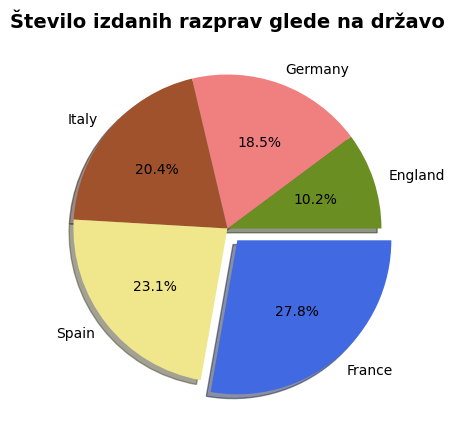

In [269]:
države_razprava = podatki[(podatki.DRŽAVA != "nan") & (podatki.RAZPRAVA == "DA")].groupby("DRŽAVA")
razprave_diagram = države_razprava.size().sort_values().tail(5).plot.pie(
    colors=['olivedrab', 'lightcoral', 'sienna', 'khaki', "royalblue"], 
    explode = (0, 0, 0, 0, 0.1), shadow=True, autopct='%1.1f%%', figsize = (5, 5))
plt.title("Število izdanih razprav glede na državo", fontsize=14, weight="bold")

In [263]:
podatki["ČAS"] = podatki.index // 500

Text(11.3, 270, '1800 - 1850')

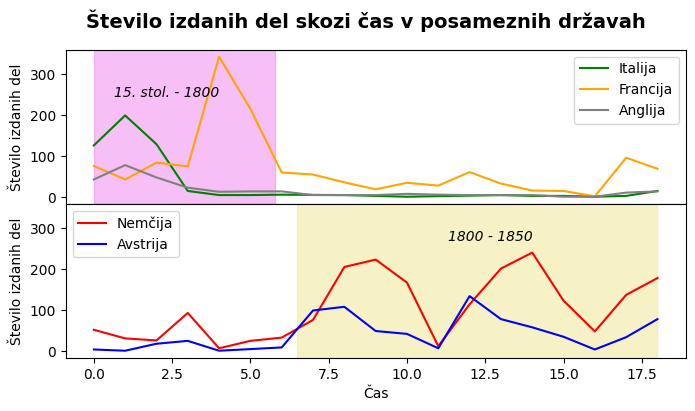

In [264]:
fig = plt.figure(figsize = (8, 4),)
gs = fig.add_gridspec(2, hspace=0)
axes= gs.subplots(sharex= True, sharey= True)

for ax in axes.flat:
    ax.set(ylabel= "Število izdanih del")

italija_čas = podatki[podatki.DRŽAVA == "Italy"].groupby("ČAS").size().plot(ax=axes[0], label = "Italija", legend = True, color= "green")
nemčija_čas = podatki[podatki.DRŽAVA == "Germany"].groupby("ČAS").size().plot(ax=axes[1], label = "Nemčija", legend = True, color="red")
francija_čas = podatki[podatki.DRŽAVA == "France"].groupby("ČAS").size().plot(ax=axes[0], label = "Francija", legend = True, color= "orange")
avstrija_čas = podatki[podatki.DRŽAVA == "Austria"].groupby("ČAS").size().plot(ax=axes[1], label = "Avstrija", legend = True, color= "blue")
anglija_čas = podatki[podatki.DRŽAVA == "England"].groupby("ČAS").size().plot(ax=axes[0], label = "Anglija", legend = True, color="gray")
axes[0].axvspan(0, 5.8, alpha=0.5, color='violet')
axes[1].axvspan(6.5, 18, alpha=0.5, color='khaki')

plt.suptitle("Število izdanih del skozi čas v posameznih državah", fontsize=14, weight="bold")
plt.xlabel("Čas")
axes[0].text(0.65, 245, '15. stol. - 1800', style='italic')
axes[1].text(11.3, 270, '1800 - 1850', style='italic')





Spodaj so zbrani "najboljši trije" glede na število izdanih del, v posameznih "disciplinah".

In [265]:
avtorji = podatki[podatki.AVTOR != None].groupby("AVTOR").size().sort_values(ascending= False).head(3).to_frame()
mesta = podatki[podatki.MESTO != None].groupby("MESTO").size().sort_values(ascending= False).head(3).to_frame()
države = podatki[podatki.DRŽAVA != None].groupby("DRŽAVA").size().sort_values(ascending= False).head(3).to_frame()
leta = podatki[podatki.LETO != 0].groupby("LETO").size().sort_values(ascending= False).head(3).to_frame()


b = pd.concat([avtorji, mesta, države, leta])
b.insert(loc = 0, column = "ZMAGOVALCI", value = b.index)
b.insert(loc = 0, column = "DISCIPLINA", value = ["", "AVTOR", "", "", "MESTO", "", "", "DRŽAVA", "", "", "LETO", ""])
b.reset_index(drop=True, inplace=True)
b.insert(loc = 2, column = "ŠTEVILO IZDAJ", value = b[b.columns[2]])
d = b.drop(columns=b.columns[3])
d

,DISCIPLINA,ZMAGOVALCI,ŠTEVILO IZDAJ
0,,"Call, Leonhard von",480
1,AVTOR,"Küffner, Joseph",187
2,,"Carulli, Ferdinando",174
3,,Paris,1237
4,MESTO,Vienna,745
5,,Mainz,359
6,,Germany,1991
7,DRŽAVA,France,1360
8,,Austria,789
9,,1800,501


(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, '13'),
  Text(1, 0, '4'),
  Text(2, 0, '7'),
  Text(3, 0, '10'),
  Text(4, 0, '11'),
  Text(5, 0, '6'),
  Text(6, 0, '5')])

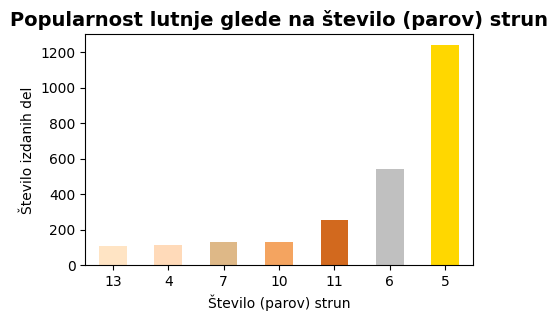

In [268]:
strune = podatki[(podatki.STRUNE != None)].groupby("STRUNE")
st = []
for x in range(9403):
    st += str(podatki.loc[x].at["STRUNE"]).split(", ")
table = pd.DataFrame(st, columns=['st'])
table[table.st != "nan"].groupby("st").size().sort_values().tail(7).plot.bar(
    figsize = (5, 3), color=["bisque", "peachpuff", "burlywood", "sandybrown", "chocolate", "silver", "gold"])
plt.title("Popularnost lutnje glede na število (parov) strun", fontsize=14, weight="bold")
plt.ylabel("Število izdanih del")
plt.xlabel("Število (parov) strun")
plt.xticks(rotation=0)



[Text(0, 0.5, 'Število izdanih del'), Text(0.5, 0, 'Čas')]

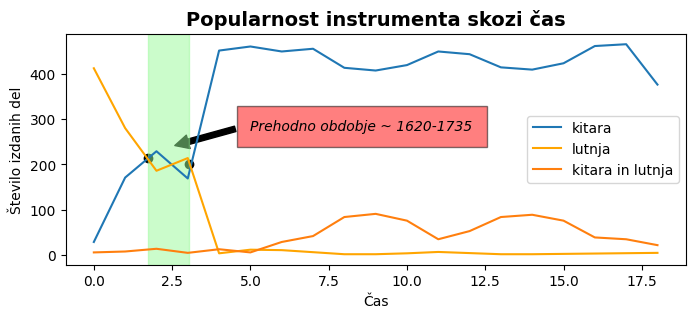

In [267]:
fig, ax = plt.subplots(1, figsize= (8,3))
plt.title("Popularnost instrumenta skozi čas", fontsize=14, weight="bold")


plt.scatter(3.05,200, color= "black")
plt.scatter(1.72,214, color= "black")
kitara_čas = podatki[podatki.INSTRUMENT == "guitar"].groupby("ČAS").size().plot(ax=ax, label = "kitara", legend = True)
lutnja_čas = podatki[podatki.INSTRUMENT == "lute"].groupby("ČAS").size().plot(ax=ax, label = "lutnja", legend = True, color="orange")
kitaralutnja_čas = podatki[podatki.INSTRUMENT == "guitar, lute"].groupby("ČAS").size().plot(ax=ax, label = "kitara in lutnja", legend = True)

ax.text(5, 275, 'Prehodno obdobje ~ 1620-1735', style='italic',
        bbox={'facecolor': 'red', 'alpha': 0.5, 'pad': 10})
puščica = (mpatches.FancyArrowPatch((4.6, 280), (2.5,240),
                                 mutation_scale=20, color="black"))
ax.add_patch(puščica)
ax.axvspan(1.72, 3.05, alpha=0.5, color='palegreen')

ax.set(ylabel= "Število izdanih del", xlabel="Čas")
